In [1]:
from cellpose_segmentation import CellposeSegmentation

In [2]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
from pathlib import Path
from cellpose import models, utils, plot

In [3]:
import IPython

%load_ext autoreload
%autoreload 2

In [4]:
# Open the HDF5 file
DATA_FOLDER = Path("w:/")
filepath = DATA_FOLDER / "sample01.pre"
file = h5py.File(filepath, 'r')

# Access the dataset
amplitude = file['amplitude/images']
phase = file['phase/images']

nimgs = np.shape(amplitude)[0]

imgs_idx = range(10, 12)

In [5]:
def plot_outlines(imgs, masks):
    # plot image with outlines overlaid in red
    for idx, img in enumerate(imgs):
        outlines = utils.outlines_list(masks[idx])
        fig, axes = plt.subplots(1, 1, figsize=(20, 20))
        axes.imshow(img)
        for o in outlines:
            plt.plot(o[:,0], o[:,1], color='r')

In [6]:
imgs_idx = range(10, 12)

imgs_phase = []
imgs_ampl = []
for img_idx in imgs_idx:
    imgs_phase.append(phase[img_idx])
    imgs_ampl.append(amplitude[img_idx])

In [7]:
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

In [8]:
cs = CellposeSegmentation(imgs_phase, imgs_ampl, model)

In [9]:
masks = cs.segment()

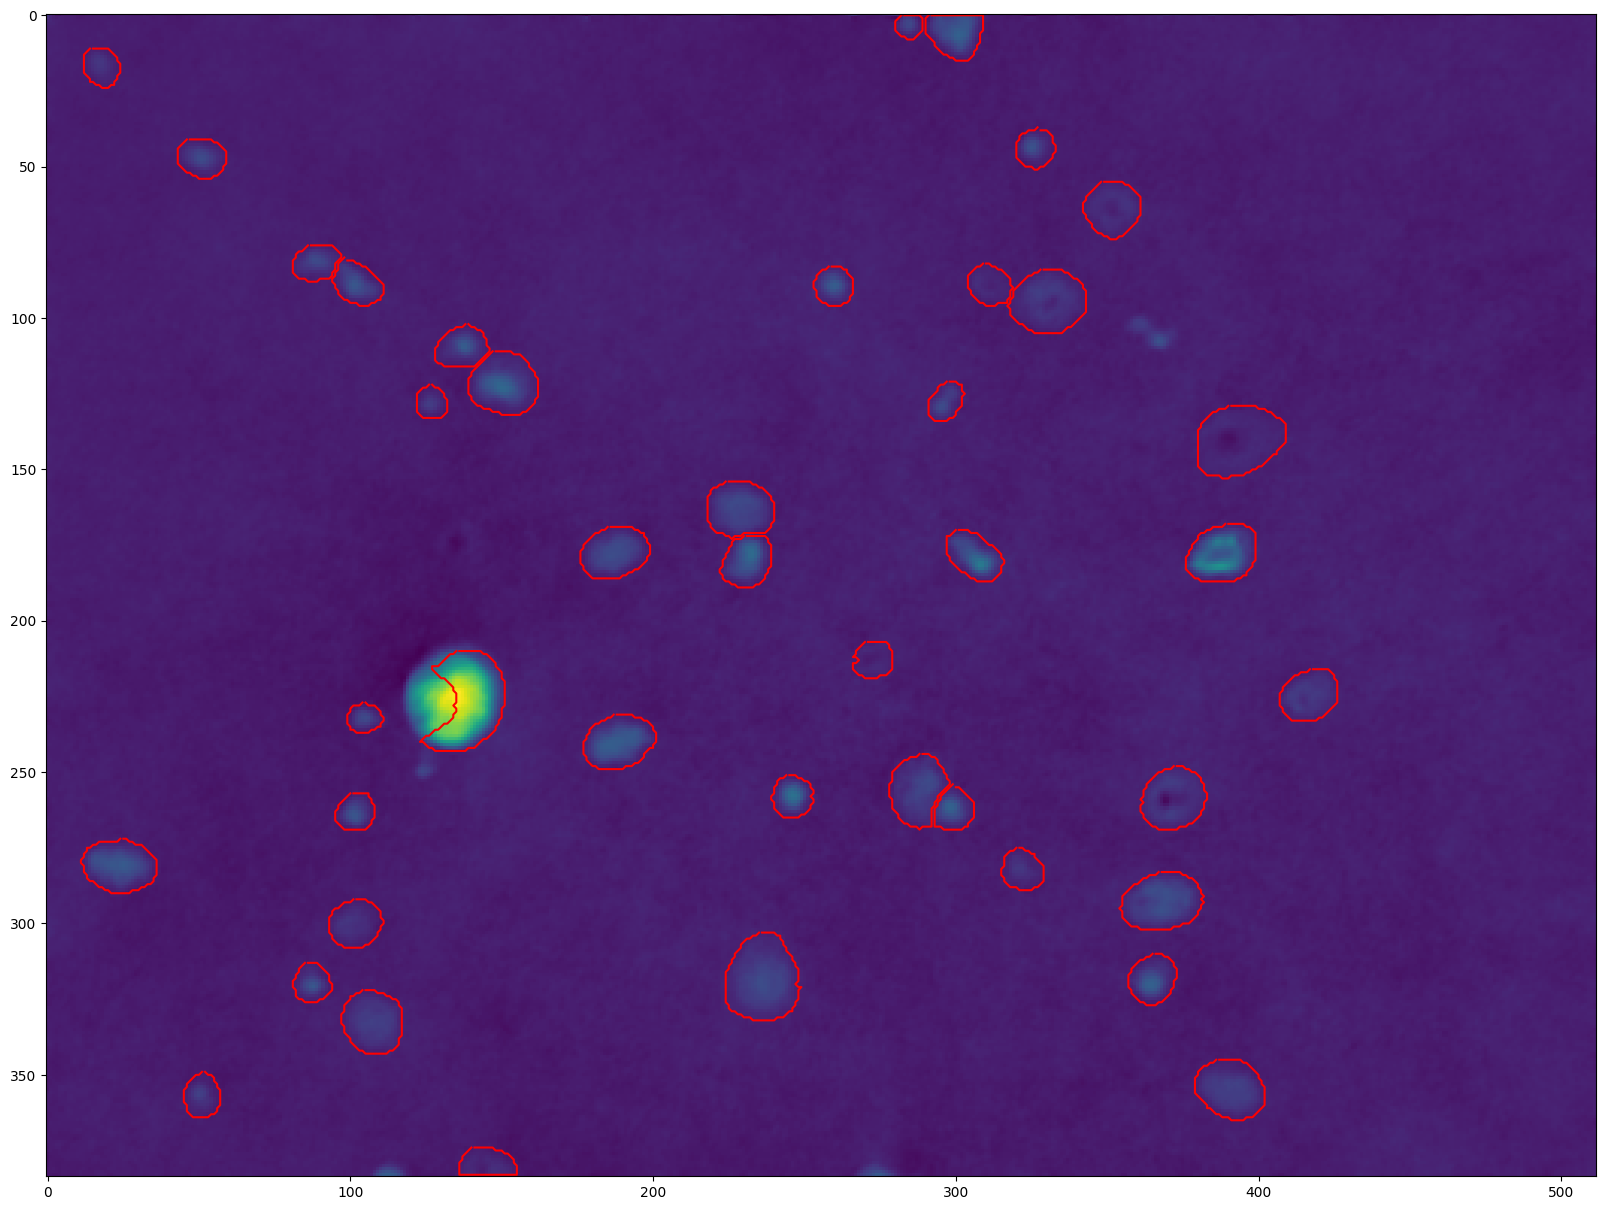

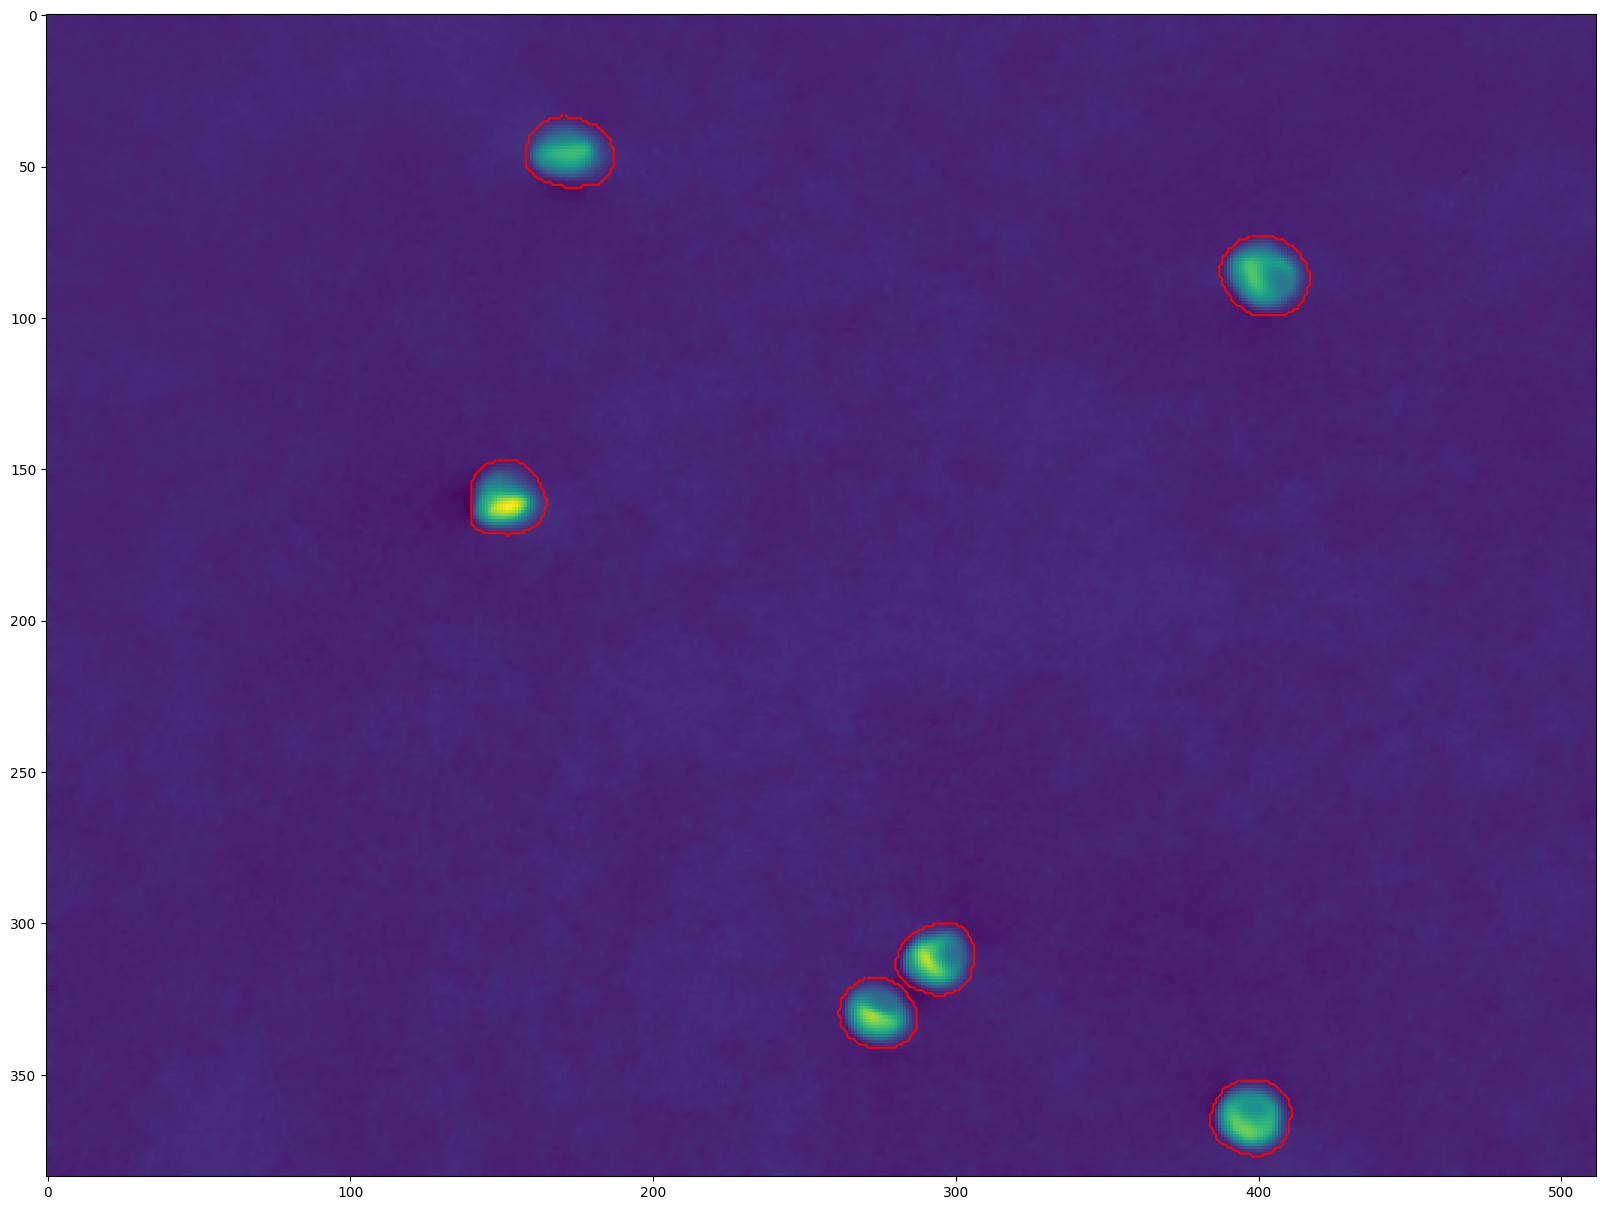

In [10]:
plot_outlines(imgs_phase, masks)

In [14]:
outlines = cs.outlines(masks[0]) # supports single image for now